In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Extract a subset of the data containing only the digits 0, 1, and 2
train_filter = np.where((train_labels == 0) | (train_labels == 1) | (train_labels == 2))
test_filter = np.where((test_labels == 0) | (test_labels == 1) | (test_labels == 2))

train_images, train_labels = train_images[train_filter], train_labels[train_filter]
test_images, test_labels = test_images[test_filter], test_labels[test_filter]

# Normalize the pixel values and reshape for CNN input
train_images = train_images.reshape((-1, 28, 28, 1)) / 255.0
test_images = test_images.reshape((-1, 28, 28, 1)) / 255.0

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=3)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=3)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


11490434/11490434 [==============================] - 0s 0us/step


In [2]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [3]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/5
117/117 [==============================] - 15s 114ms/step - loss: 0.1105 - accuracy: 0.9647 - val_loss: 0.0245 - val_accuracy: 0.9911
Epoch 2/5
117/117 [==============================] - 10s 85ms/step - loss: 0.0287 - accuracy: 0.9915 - val_loss: 0.0139 - val_accuracy: 0.9954
Epoch 3/5
117/117 [==============================] - 12s 100ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.0111 - val_accuracy: 0.9957
Epoch 4/5
117/117 [==============================] - 12s 107ms/step - loss: 0.0152 - accuracy: 0.9948 - val_loss: 0.0084 - val_accuracy: 0.9976
Epoch 5/5
117/117 [==============================] - 12s 101ms/step - loss: 0.0121 - accuracy: 0.9962 - val_loss: 0.0061 - val_accuracy: 0.9979


In [5]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

99/99 [==============================] - 1s 8ms/step - loss: 0.0051 - accuracy: 0.9975
Test accuracy: 0.9974579215049744


In [6]:
# Display some images and their predicted labels
def display_predictions(images, labels, predictions, num_images):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {np.argmax(labels[i])}, Pred: {np.argmax(predictions[i])}')
        plt.axis('off')
    plt.show()

99/99 [==============================] - 1s 8ms/step


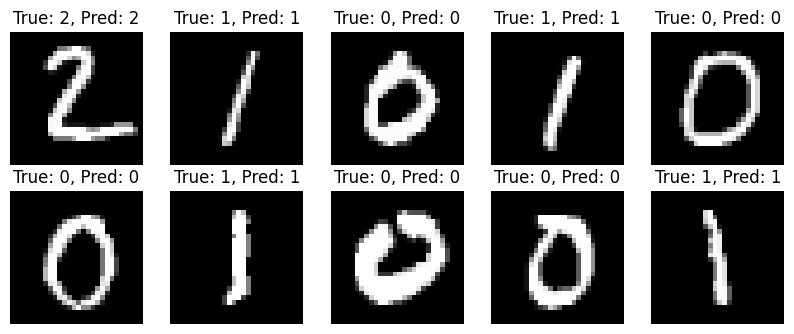

In [7]:
# Get predictions on test set
test_predictions = model.predict(test_images)

# Display predictions
display_predictions(test_images, test_labels, test_predictions, 10)